# Emotion Analysis
This project performs emotion analysis on different statements to analyse the emotions attached with a statement.

# Step 1: Gathering Data

We read annotated Text Data compiled from multiple sources

In [1]:
'''

1) Create an asset folder and save model checkpoints and trained model in there -> Done
2) Modify the training part and the Evaluation part according to MNIST Keras MLP file -> Done
3) Resample the data to make the distribution even -> Done
4) Compare MOdel evaluation with saved x_train,x_test,y_train,y_test with again generated x_train,x_test,y_train,y_test

'''

'\n\n1) Create an asset folder and save model checkpoints and trained model in there -> Done\n2) Modify the training part and the Evaluation part according to MNIST Keras MLP file -> Done\n3) Resample the data to make the distribution even -> Done\n4) Compare MOdel evaluation with saved x_train,x_test,y_train,y_test with again generated x_train,x_test,y_train,y_test\n\n'

In [5]:
import pandas as pd
import numpy as np
import pickle
import matplotlib.pyplot as plt
import seaborn as sns


In [6]:
df = pd.read_csv("datasets/master.csv", encoding='utf-8')
df['content'] = df['content'].astype(str)# Converts all the rows in the content column into string
# df = df.reindex(np.random.permutation(df.index))
df['content'][342119]

"i feel like if i ask them to stay for me then i'm being the selfish one even though they are the ones making plans that they know i can't do with them"

In [7]:
emotions = df.emotion.unique() # All classes of emotions
df
# df = df.reindex(np.random.permutation(df.index)) # re - indexing all the rows randomly -> 
# # Random re - indexing is done have a random shuffling in the data so that distribution is comparable in Training
# # and validation set
# df.to_csv("datasets/master.csv", index = False) # saving the dataFrame to a csv file

,emotion,content
0,love,i had written or said but i always got the fee...
1,joy,i feel readers will be insanely entertained by
2,love,i got a good night s sleep last night i m over...
3,sad,i feel myself getting stressed out
4,joy,i feel like i can't leave the last time i felt...
5,sad,i feel really really rotten
6,sad,i'm giving it a few days before i film the las...
7,sad,i feel remorseful wishing i'd gone easy on oth...
8,fear,i only read about half of this thread but i ca...
9,joy,i'm keeping an ice pack to my face and i have ...


In [31]:
print(df['content'][342117]) # Our read Data -> 342120 rows
print(df['emotion'][342117]) 
print(emotions) # Classes of emotions -> 9 classes

y = df.drop(columns = ['emotion'])
y = y.values
y = np.asarray(y)


i think he is really feeling the song and is very sincere which is an impressive thing
joy
['love' 'joy' 'sad' 'fear' 'anger' 'guilt' 'surprise' 'disgust' 'shame']


(342120, 1)

# Step 2 : Data Visualization

In [6]:
# Statistics Of the Data

print(df.describe(), "\n")
print(df.info(),"\n")

# Descriptive statistics that summarize the central tendency, dispersion and shape of a dataset’s distribution, 
# excluding NaN values
# Descriptive Statistics involves -> count, unique, top, and freq. 
# The top is the most common value. The freq is the most common value’s frequency. 
# Timestamps also include the first and last items.

print(df.count(), "\n")# Count non-NA cells for each column or row
print(df.isna().sum())
print("\n")
print(df.columns.values) # All Columns in the Dataframe
print("\n")

       emotion                                            content
count   342120                                             342120
unique       9                                             342120
top        joy  i feel more like those years we treasured they...
freq    110693                                                  1 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 342120 entries, 0 to 342119
Data columns (total 2 columns):
emotion    342120 non-null object
content    342120 non-null object
dtypes: object(2)
memory usage: 5.2+ MB
None 

emotion    342120
content    342120
dtype: int64 

emotion    0
content    0
dtype: int64


['emotion' 'content']




joy         110693
sad         103246
anger        47318
fear         34808
love         29048
surprise     12650
shame         1559
guilt         1487
disgust       1311
Name: emotion, dtype: int64


joy         32.355022
sad         30.178300
anger       13.830820
fear        10.174208
love         8.490588
surprise     3.697533
shame        0.455688
guilt        0.434643
disgust      0.383199
Name: emotion, dtype: float64


AxesSubplot(0.125,0.125;0.775x0.755)


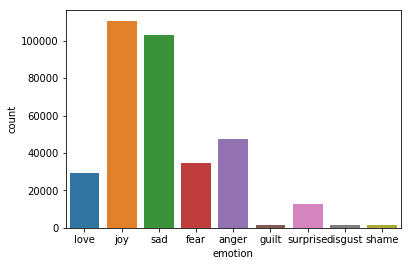

In [7]:
# Data Distribution

import seaborn as sns

print(df['emotion'].value_counts())
print("\n")
print((df['emotion'].value_counts()/df['emotion'].count())*100)
print("\n")
print(sns.countplot("emotion",data = df))

# Our Distribution is highly imbalanced -> We will go with this distribution only first to check the performance
# of our model

# Step 3 : Data Preprocessing

joy        110693
sad        103246
anger       47318
neutral     46055
fear        34808
Name: emotion, dtype: int64


joy        32.355022
sad        30.178300
anger      13.830820
neutral    13.461651
fear       10.174208
Name: emotion, dtype: float64


AxesSubplot(0.125,0.125;0.775x0.755)


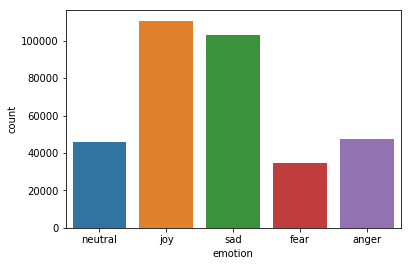

In [8]:
# Combining classes

# 1) joy, sad, anger, fear, neutral -> combine love, surprise, shame, guilt, disgust and make sad, joy datapoints as 50k each


removed_classes = ['love','surprise','shame','guilt','disgust']

for i in removed_classes:
    df = df.replace(i, 'neutral')

# filter_sad = df.where(df['emotion'] == 'sad')
# filter_sad = filter_sad.dropna()
# print(filter_sad)
# print(df)
    
print(df['emotion'].value_counts())
print("\n")
print((df['emotion'].value_counts()/df['emotion'].count())*100)
print("\n")
print(sns.countplot("emotion",data = df))

In [9]:
# Sampling Data from combined classes df

# sampled_df = pd.DataFrame(columns = ['emotion','content'])

# sampled_classes = ['joy' , 'sad']
# unsampled_classes = ['neutral','fear','anger']

# for i in sampled_classes:
#     temp_df = df.loc[df.emotion == i]
#     no_samples_removed = int(temp_df['emotion'].value_counts() - 50000)
#     print(no_samples_removed)
#     sampled_df = sampled_df.append(temp_df.drop(np.random.choice(temp_df.index, no_samples_removed, replace=False)))

# # print(sampled_df.isna().sum())

# for i in unsampled_classes:
#     temp_df = df.loc[df.emotion == i]
#     no_samples_removed = int(temp_df['emotion'].value_counts() - 0)
#     print(no_samples_removed)
#     sampled_df = sampled_df.append(temp_df)

# # print(sampled_df.isna().sum())

# sampled_df = sampled_df.reindex(np.random.permutation(sampled_df.index))
# print(sampled_df.isna().sum())
# sampled_df.loc[sampled_df.content == None]
# sampled_df
# sampled_df.to_csv("datasets/sampled.csv", index = False)

In [10]:
# Reading our sampled data as DataFrame

sampled_df = pd.read_csv("datasets/sampled.csv" , encoding='utf-8')
sampled_df['content'] = sampled_df['content'].astype(str)
print(sampled_df.isna().sum())
sampled_df

emotion    0
content    0
dtype: int64


,emotion,content
0,joy,When my former boyfriend and I reconciled and ...
1,sad,i was feeling a little whiney about winter coming
2,sad,i am the one who ends up feeling bad for causi...
3,fear,i feel i am treading always a shaky tightrope ...
4,fear,i still feel fearful for when they leave to go...
5,neutral,i feel this smells a bit too sweet or candy li...
6,sad,i feel pretty jaded that it s taken me 20 year...
7,anger,i need to calm down give myself a break and re...
8,joy,i feel at ease and tranquil where i can finall...
9,anger,i am also feeling furious dismayed terrified u...


sad        50000
joy        50000
anger      47318
neutral    46055
fear       34808
Name: emotion, dtype: int64


sad        21.912429
joy        21.912429
anger      20.737046
neutral    20.183539
fear       15.254557
Name: emotion, dtype: float64


AxesSubplot(0.125,0.125;0.775x0.755)


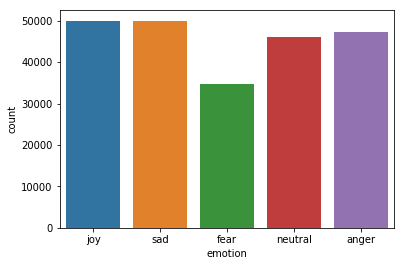

In [11]:
# Sampled Data Distribution

print(sampled_df['emotion'].value_counts())
print("\n")
print((sampled_df['emotion'].value_counts()/sampled_df['emotion'].count())*100)
print("\n")
print(sns.countplot("emotion",data = sampled_df))

In [12]:
# Statistical Analysis on Sampled DataFrame

print(sampled_df.info(),"\n")

# Descriptive statistics that summarize the central tendency, dispersion and shape of a dataset’s distribution, 
# excluding NaN values
# Descriptive Statistics involves -> count, unique, top, and freq. 
# The top is the most common value. The freq is the most common value’s frequency. 
# Timestamps also include the first and last items.

print(sampled_df.count(), "\n")# Count non-NA cells for each column or row
print(sampled_df.isna().sum())
print("\n")
print(sampled_df.columns.values) # All Columns in the Dataframe
print("\n")

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 228181 entries, 0 to 228180
Data columns (total 2 columns):
emotion    228181 non-null object
content    228181 non-null object
dtypes: object(2)
memory usage: 3.5+ MB
None 

emotion    228181
content    228181
dtype: int64 

emotion    0
content    0
dtype: int64


['emotion' 'content']




# Step 3: Data Modelling

In [13]:
# Integer labels for emotion column

emotions_list = sampled_df.emotion.unique().tolist()
print(emotions_list, "\n")

for i in emotions_list:
    sampled_df = sampled_df.replace(i, emotions_list.index(i))

print("Labels after Integer enoding \n")
print(sampled_df.emotion.unique())

['joy', 'sad', 'fear', 'neutral', 'anger'] 

Labels after Integer enoding 

[0 1 2 3 4]


In [14]:
# Statistical Analysis after Integer encoding

print(sampled_df.info(),"\n")

# Descriptive statistics that summarize the central tendency, dispersion and shape of a dataset’s distribution, 
# excluding NaN values
# Descriptive Statistics involves -> count, unique, top, and freq. 
# The top is the most common value. The freq is the most common value’s frequency. 
# Timestamps also include the first and last items.

print(sampled_df.count(), "\n")# Count non-NA cells for each column or row
print(sampled_df.isna().sum())
print("\n")
print(sampled_df.columns.values) # All Columns in the Dataframe
print("\n")

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 228181 entries, 0 to 228180
Data columns (total 2 columns):
emotion    228181 non-null int64
content    228181 non-null object
dtypes: int64(1), object(1)
memory usage: 3.5+ MB
None 

emotion    228181
content    228181
dtype: int64 

emotion    0
content    0
dtype: int64


['emotion' 'content']




In [15]:
# Feature Engineering

from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
vocabulary_size = 100000
tokenizer = Tokenizer(num_words = vocabulary_size)
tokenizer.fit_on_texts(sampled_df['content'])
sequences = tokenizer.texts_to_sequences(sampled_df['content'])
data = pad_sequences(sequences, maxlen = 50)
X = data

Using TensorFlow backend.


In [16]:
X.shape

(228181, 50)

In [17]:
# One - hot encoding

from keras.utils import to_categorical
# print(df['emotion'])
Y = to_categorical(sampled_df['emotion'])
Y.shape

(228181, 5)

In [18]:
Y.shape

(228181, 5)

In [19]:
# Train_test split
# from sklearn.model_selection import train_test_split
# x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size = 0.2, random_state=4)

# np.save('x_train', x_train)
# np.save('x_test', x_test)
# np.save('y_train', y_train)
# np.save('y_test', y_test)

x_train = np.load('x_train.npy')
x_test = np.load('x_test.npy')
y_train = np.load('y_train.npy')
y_test = np.load('y_test.npy')
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(182544, 50)
(45637, 50)
(182544, 5)
(45637, 5)


# Step 4 : Choosing Model
Using word embeddings to create a LSTM classification model

In [20]:
from keras.models import Model
from keras.layers import LSTM, Activation, Dense, Dropout, Input, Embedding
from keras.optimizers import RMSprop
from keras.preprocessing.text import Tokenizer
from keras.preprocessing import sequence

In [21]:
x_train = x_train.reshape(len(x_train), 50)
inputs = Input(shape=[50])
layer = Embedding(100000,500,input_length=50)(inputs)
layer = LSTM(1000)(layer)
layer = Dense(256)(layer)
layer = Activation('relu')(layer)
layer = Dropout(0.5)(layer)
layer = Dense(5)(layer)
layer = Activation('softmax')(layer)
model = Model(inputs = inputs,outputs = layer)
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 50)                0         
_________________________________________________________________
embedding_1 (Embedding)      (None, 50, 500)           50000000  
_________________________________________________________________
lstm_1 (LSTM)                (None, 1000)              6004000   
_________________________________________________________________
dense_1 (Dense)              (None, 256)               256256    
_________________________________________________________________
activation_1 (Activation)    (None, 256)               0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 256)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 5)                 1285      
__________

In [22]:
# Compiling the model

model.compile(loss = 'categorical_crossentropy',optimizer = "adam",metrics = ['accuracy'])

from keras import callbacks
tensorboard = callbacks.TensorBoard(log_dir = './logs', histogram_freq = 0, batch_size = 16, write_grads = True , write_graph = True)
model_checkpoints = callbacks.ModelCheckpoint("checkpoint-{val_loss:.3f}.h5", monitor = 'val_loss', verbose = 0, save_best_only = True, save_weights_only = False, mode = 'auto', period = 0)

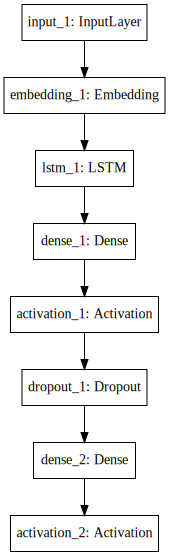

In [23]:
# Model Visualization

from IPython.display import SVG
from keras.utils.vis_utils import model_to_dot, plot_model

plot_model(model, to_file='model.png', show_shapes=True, show_layer_names=True)
SVG(model_to_dot(model).create(prog='dot', format='svg'))

# Step 5 : Training

In [48]:
# Start Training

# history = model.fit(x_train,y_train,batch_size = 256,epochs = 2, validation_split = 0.6, shuffle = True)

Train on 73017 samples, validate on 109527 samples
Epoch 1/2
73017/73017 [==============================] - 2186s 30ms/step - loss: 0.5862 - acc: 0.7788 - val_loss: 0.1173 - val_acc: 0.9620
Epoch 2/2
73017/73017 [==============================] - 2158s 30ms/step - loss: 0.0972 - acc: 0.9684 - val_loss: 0.1077 - val_acc: 0.9665


In [50]:
# Load a model from a particular checkpoint
# model = keras.models.load_model("checkpoint-0.91.h5")

In [51]:
# Saving model training and history

# model.save("master_model.h5") # saving model

# import pickle
# with open('trainHistoryDict', 'wb') as file_pi:
#     pickle.dump(history.history, file_pi) # Saving History of model

# Step 6 : Evaluation

We calulate conusion matrix, precison, recall and f1_score for every class and final accuracy

In [24]:
# Reading the assets

from keras.models import load_model
model = load_model('master_model.h5') # Reading the Trained model

import pickle
with open('trainHistoryDict', 'rb') as file_pi:
    model_history = pickle.load(file_pi) # Reading the history of the Trained model


In [22]:
# Keras evaluation

# train_loss, train_acc = model.evaluate(x_train, y_train)
# train_loss = train_loss
# train_acc = train_acc
# print(train_loss, train_acc)

# test_loss, test_acc = model.evaluate(x_test, y_test)
# test_loss = test_loss
# test_acc = test_acc
# print(test_loss, test_acc)

182544/182544 [==============================] - 1737s 10ms/step
0.09219031569288713 0.9704180909808047
45637/45637 [==============================] - 440s 10ms/step
0.11121363455586625 0.9646120472423692


In [25]:
# Saving our Predictions

# np.save('train_Y_cat', train_Y_cat)
# np.save('pred_Y_tr_cat',pred_Y_tr_cat)
# np.save('test_Y_cat', test_Y_cat)
# np.save('pred_Y_cat', pred_Y_cat)

train_Y_cat = np.load('train_Y_cat.npy')
pred_Y_tr_cat = np.load('pred_Y_tr_cat.npy')
test_Y_cat = np.load('test_Y_cat.npy')
pred_Y_cat = np.load('pred_Y_cat.npy')
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(182544, 50)
(45637, 50)
(182544, 5)
(45637, 5)


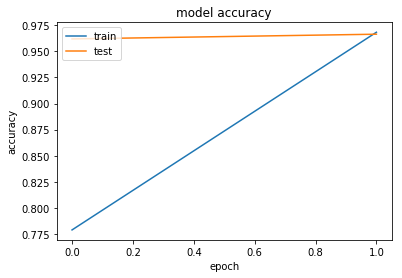

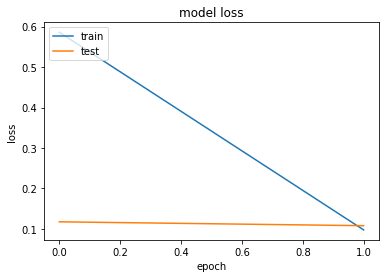

<Figure size 432x288 with 0 Axes>

In [24]:
# Plots

import matplotlib.pyplot as plt

# summarize history for accuracy
plt.plot(model_history['acc'])
plt.plot(model_history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
plt.savefig('model_accuracy.png')

# summarize history for loss
plt.plot(model_history['loss'])
plt.plot(model_history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
plt.savefig('model_loss.png')

In [26]:
# Classification Report

from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# pred_Y_tr = model.predict(x_train,batch_size = None, verbose = True)
# pred_Y_tr_cat = np.argmax(pred_Y_tr, -1)
# train_Y_cat = np.argmax(y_train, -1)

# print(pred_Y_tr_cat, train_Y_cat)

# pred_Y = model.predict(x_test, batch_size = None, verbose = True)
# pred_Y_cat = np.argmax(pred_Y, -1)
# test_Y_cat = np.argmax(y_test, -1)

# print(pred_Y_cat, test_Y_cat)

cnf_matrix_train_data = confusion_matrix(train_Y_cat, pred_Y_tr_cat)
cnf_matrix_test_data = confusion_matrix(test_Y_cat, pred_Y_cat)

print('Accuracy on Train Data: %2.2f%%' % (accuracy_score(train_Y_cat, pred_Y_tr_cat)))
print('Accuracy on Test Data: %2.2f%%' % (accuracy_score(test_Y_cat, pred_Y_cat)))
print(classification_report(test_Y_cat, pred_Y_cat))

Accuracy on Train Data: 0.97%
Accuracy on Test Data: 0.96%
              precision    recall  f1-score   support

           0       0.98      0.97      0.98     10008
           1       0.99      0.97      0.98      9848
           2       0.99      0.92      0.95      6984
           3       0.90      0.98      0.94      9217
           4       0.97      0.96      0.97      9580

   micro avg       0.96      0.96      0.96     45637
   macro avg       0.97      0.96      0.96     45637
weighted avg       0.97      0.96      0.96     45637



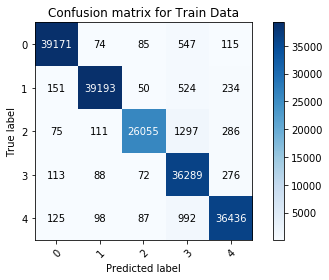

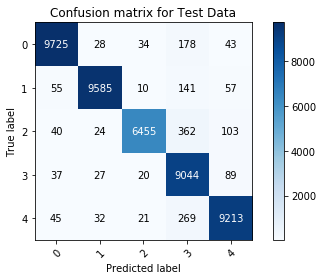

In [27]:
# Plotting Confusion Matrix

from sklearn.metrics import confusion_matrix
from sklearn.utils.multiclass import unique_labels

digits = unique_labels(test_Y_cat, pred_Y_cat).tolist()

cnf_matrix_train = confusion_matrix(train_Y_cat, pred_Y_tr_cat, labels = digits)
cnf_matrix_test = confusion_matrix(test_Y_cat, pred_Y_cat, labels = digits)

def plot_confusion_matrix(confusion_matrix, classes, normalize = False, title = None, cmap = plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if not title:
        if normalize:
            title = 'Normalized confusion matrix'
        else:
            title = 'Confusion matrix, without normalization'

    # Compute confusion matrix
    cm = confusion_matrix
    # Only use the labels that appear in the data
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

    fig, ax = plt.subplots()
    im = ax.imshow(cm, interpolation='nearest', cmap=cmap)
    ax.figure.colorbar(im, ax=ax)
    # We want to show all ticks...
    ax.set(xticks = np.arange(cm.shape[1]),
           yticks = np.arange(cm.shape[0]),
           # ... and label them with the respective list entries
           xticklabels=classes, yticklabels=classes,
           title=title,
           ylabel = 'True label',
           xlabel = 'Predicted label')

    # Rotate the tick labels and set their alignment.
    plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
             rotation_mode="anchor")

    # Loop over data dimensions and create text annotations.
    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            ax.text(j, i, format(cm[i, j], fmt),
                    ha="center", va="center",
                    color="white" if cm[i, j] > thresh else "black")
    fig.tight_layout()
    return ax


np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
plot_confusion_matrix(cnf_matrix_train, classes = digits, title = 'Confusion matrix for Train Data')

# # Plot normalized confusion matrix
plot_confusion_matrix(cnf_matrix_test, classes = digits, title='Confusion matrix for Test Data')

# precision = true_pos / (true_pos + false_pos)
# recall = true_pos / (true_pos + false_neg)

# Step 7 : Prediction

In [28]:
statement = ["I envy you"]
# statement = [sampled_df['content'][228162]] # 0 to 228180
sequences = tokenizer.texts_to_sequences(statement)
data = pad_sequences(sequences, maxlen=50)
y = model.predict(data)
# print(y)
argument = np.argmax(y[0], axis=0)
print(emotions_list[argument])

neutral


# Feedbacks